## Idea: A subscriber will stay longer on bikes compared to a customer.
### Null Hypothesis ($H_0$)
### The average travel time of subscribers will be greater than that of customers.
### $H_0$ : Average(customer) < Average(subscriber)
### Alternative Hypothesis ($H_a$)
### The average travel time of subscribers will be less than or equal to that of customers.
### $H_a$ : Average(customer) >= Average(subscriber)
### Significance Threshold:
### α = 0.05

In [1]:
# PUI2018 - Homework 4 - Gabriel Yin - ty1045 - N10088627 
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import requests, json
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ty1045/PUIdata


In [2]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system
### this code cell does a lot of things: looks for existing files, download a file if none is there, unzips it, moves it.
### you do not have to have a code cell this complicated. 
### As long as 
### 1) your research is reproducible: we can access the same file as you without having to ask you for the file
### 2) and your data is stored in a directory pointed to by the env variable PUIDATA 
### you will be fine. We already explored how to download data in other notebooks!

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201607'
getCitiBikeCSV(datestring)
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

file in place, you can continue


In [4]:
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0
5,672,7/1/2016 00:00:45,7/1/2016 00:11:57,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,15444,Subscriber,1991.0,1
6,466,7/1/2016 00:00:49,7/1/2016 00:08:35,128,MacDougal St & Prince St,40.727103,-74.002971,250,Lafayette St & Jersey St N,40.724561,-73.995653,14676,Subscriber,1989.0,1
7,556,7/1/2016 00:00:51,7/1/2016 00:10:07,433,E 13 St & Avenue A,40.729554,-73.980572,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,25755,Subscriber,1989.0,1
8,767,7/1/2016 00:00:51,7/1/2016 00:13:39,254,W 11 St & 6 Ave,40.735324,-73.998004,439,E 4 St & 2 Ave,40.726281,-73.989780,18871,Subscriber,1976.0,1
9,1442,7/1/2016 00:00:54,7/1/2016 00:24:56,515,W 43 St & 10 Ave,40.760094,-73.994618,511,E 14 St & Avenue B,40.729387,-73.977724,20381,Subscriber,1994.0,2


In [5]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.380110e+06,1.380110e+06,1.380110e+06,1.380110e+06,1.380110e+06,1.380110e+06,1.380110e+06,1.380110e+06,1.176515e+06,1.380110e+06
mean,1.000328e+03,1.007292e+03,4.073731e+01,-7.398689e+01,9.956551e+02,4.073686e+01,-7.398675e+01,2.108539e+04,1.978210e+03,1.065512e+00
std,1.373462e+04,1.138365e+03,2.282723e-02,1.643755e-02,1.130148e+03,8.082473e-02,1.417894e-01,3.630706e+03,1.156393e+01,6.005912e-01
min,6.100000e+01,7.200000e+01,4.064668e+01,-7.402545e+01,7.200000e+01,0.000000e+00,-7.406419e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.030000e+02,3.320000e+02,4.072066e+01,-7.399884e+01,3.300000e+02,4.072037e+01,-7.399915e+01,1.787800e+04,1.970000e+03,1.000000e+00
50%,6.720000e+02,4.580000e+02,4.073726e+01,-7.398889e+01,4.570000e+02,4.073705e+01,-7.398890e+01,2.127500e+04,1.981000e+03,1.000000e+00
75%,1.143000e+03,5.390000e+02,4.075456e+01,-7.397769e+01,5.370000e+02,4.075300e+01,-7.397771e+01,2.491200e+04,1.987000e+03,1.000000e+00
max,6.707533e+06,3.266000e+03,4.078721e+01,-7.392850e+01,3.357000e+03,4.080084e+01,0.000000e+00,2.615000e+04,2.000000e+03,2.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380110 entries, 0 to 1380109
Data columns (total 15 columns):
tripduration               1380110 non-null int64
starttime                  1380110 non-null object
stoptime                   1380110 non-null object
start station id           1380110 non-null int64
start station name         1380110 non-null object
start station latitude     1380110 non-null float64
start station longitude    1380110 non-null float64
end station id             1380110 non-null int64
end station name           1380110 non-null object
end station latitude       1380110 non-null float64
end station longitude      1380110 non-null float64
bikeid                     1380110 non-null int64
usertype                   1380110 non-null object
birth year                 1176515 non-null float64
gender                     1380110 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 157.9+ MB


In [7]:
df.tail(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1380100,423,7/31/2016 23:57:52,8/1/2016 00:04:55,494,W 26 St & 8 Ave,40.747348,-73.997236,505,6 Ave & W 33 St,40.749013,-73.988484,22200,Subscriber,1977.0,2
1380101,340,7/31/2016 23:57:58,8/1/2016 00:03:38,409,DeKalb Ave & Skillman St,40.690649,-73.956431,436,Hancock St & Bedford Ave,40.682166,-73.953990,23044,Subscriber,1974.0,0
1380102,1306,7/31/2016 23:58:02,8/1/2016 00:19:49,470,W 20 St & 8 Ave,40.743453,-74.000040,453,W 22 St & 8 Ave,40.744751,-73.999154,25758,Subscriber,1964.0,1
1380103,494,7/31/2016 23:58:25,8/1/2016 00:06:39,468,Broadway & W 55 St,40.765265,-73.981923,514,12 Ave & W 40 St,40.760875,-74.002777,19931,Subscriber,1973.0,2
1380104,372,7/31/2016 23:58:27,8/1/2016 00:04:40,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,243,Fulton St & Rockwell Pl,40.688226,-73.979382,15211,Subscriber,1988.0,1
1380105,593,7/31/2016 23:59:07,8/1/2016 00:09:01,349,Rivington St & Ridge St,40.718502,-73.983299,545,E 23 St & 1 Ave,40.736502,-73.978095,25647,Subscriber,1991.0,1
1380106,1056,7/31/2016 23:59:13,8/1/2016 00:16:49,487,E 20 St & FDR Drive,40.733143,-73.975739,225,W 14 St & The High Line,40.741951,-74.008030,24362,Subscriber,1992.0,1
1380107,845,7/31/2016 23:59:14,8/1/2016 00:13:20,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,116,W 17 St & 8 Ave,40.741776,-74.001497,22503,Subscriber,1988.0,2
1380108,428,7/31/2016 23:59:53,8/1/2016 00:07:01,387,Centre St & Chambers St,40.712733,-74.004607,2008,Little West St & 1 Pl,40.705693,-74.016777,26015,Subscriber,1982.0,1
1380109,330,7/31/2016 23:59:59,8/1/2016 00:05:29,507,E 25 St & 2 Ave,40.739126,-73.979738,433,E 13 St & Avenue A,40.729554,-73.980572,24263,Subscriber,1995.0,1


In [8]:
drop_cols = ['stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'birth year', 'gender']

In [9]:
copy = df.copy(deep=True)

In [10]:
df.drop(['stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [11]:
df.head(10)

,tripduration,starttime,usertype
0,704,7/1/2016 00:00:02,Customer
1,492,7/1/2016 00:00:18,Subscriber
2,191,7/1/2016 00:00:19,Subscriber
3,687,7/1/2016 00:00:24,Customer
4,609,7/1/2016 00:00:31,Customer
5,672,7/1/2016 00:00:45,Subscriber
6,466,7/1/2016 00:00:49,Subscriber
7,556,7/1/2016 00:00:51,Subscriber
8,767,7/1/2016 00:00:51,Subscriber
9,1442,7/1/2016 00:00:54,Subscriber


In [12]:
df.describe()

,tripduration
count,1.380110e+06
mean,1.000328e+03
std,1.373462e+04
min,6.100000e+01
25%,4.030000e+02
50%,6.720000e+02
75%,1.143000e+03
max,6.707533e+06


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380110 entries, 0 to 1380109
Data columns (total 3 columns):
tripduration    1380110 non-null int64
starttime       1380110 non-null object
usertype        1380110 non-null object
dtypes: int64(1), object(2)
memory usage: 31.6+ MB


Text(0.5,1,'Average Trip Duration vs. User Types')

<Figure size 720x432 with 0 Axes>

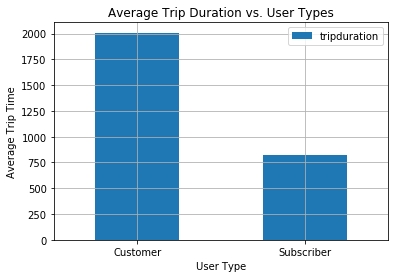

In [14]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,6))
users_mean_travel_time = df.groupby(['usertype']).mean()
users_mean_travel_time.plot(kind='bar',rot=360)
plt.grid(b=True)
plt.xlabel('User Type')
plt.ylabel('Average Trip Time')
plt.title('Average Trip Duration vs. User Types')

### Figure 1: Average Trip Duration vs. User Type
#### We can see clearly that the average trip duration of customer is greater than that of subscriber.